# Theoretical values of energies

In [2]:
# %load ../../preamb.py
import numpy as np
import uncertainties as uc
import uncertainties.unumpy as un
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter as sav
from scipy.special import erfc
from scipy.integrate import quad
import sys
import re

npy_dir = "./npy/"


In [35]:
# %load "../../style.py"
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import colorConverter
from matplotlib import rcParams
import seaborn as sns
from scipy.optimize import curve_fit

sns.set(style='ticks', palette='Set2') 
sns.despine()

# These are the colors. Notice how this is programmed:
# You initialize your colors by 
# colorset = palette()
# then you can cycle through the colors:
# color = next(colorset)
# if you want your set to be reset, just create
# a new palette() instance! This way the colors do not interfere.

color_names = ['windows blue', "pale red", "faded green", "amber", 
          'dark green', 'dark fuchsia', 'browny orange', 
          'puke green', 'dark royal blue', 'dusty purple', 'red orange']
colors = sns.xkcd_palette(color_names)
palette = lambda: itertools.cycle(sns.xkcd_palette(color_names) )

fontsize_labels = 26    # size used in latex document
rcParams['text.latex.preamble'] = [r'\usepackage[cmbright]{sfmath}']
rcParams['font.family']= 'sans-serif'
rcParams['font.sans-serif']= 'cmbright'
rcParams['font.weight'] = "light"

rcParams['text.usetex'] = True

rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['legend.markerscale'] = 4
rcParams['axes.titlesize'] = fontsize_labels
rcParams['text.color'] = "0.3"
rcParams['xtick.color'] = "0.3"
rcParams['ytick.color'] = "0.3"
rcParams['axes.labelcolor'] = "0.3"
rcParams['axes.edgecolor'] = "0.8"

xfactor = 2
rcParams['figure.figsize'] = (xfactor*6.2, xfactor*3.83)  

save_fig = True
if not save_fig:
        rcParams['figure.figsize'] = (13, 8) 
fig_dir = "./figures/"  # directory of figures

def fixticks(ax):    
    for t in ax.xaxis.get_ticklines(): t.set_color('0.8')
    for t in ax.yaxis.get_ticklines(): t.set_color('0.8')


In [5]:
# %load "../../preamb.py"
import numpy as np
import uncertainties as uc
import uncertainties.unumpy as un
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter as sav
from scipy.special import erfc
from scipy.integrate import quad
import sys

npy_dir = "./data_npy/"


## Functions

In [18]:
def E_red(E_gamma):
    from scipy.constants import physical_constants as pc
    m_e = pc["electron mass energy equivalent in MeV"][0] * 10**3 # in keV
    return(E_gamma / m_e)
    
def E_photon(E_gamma, theta_deg):
    theta = theta_deg * np.pi / 180
    b = E_red(E_gamma) * (1 - np.cos(theta))
    return E_gamma / (1 + b)

def E_electron(E_gamma, theta_deg):
    theta = theta_deg * np.pi / 180
    b = E_red(E_gamma) * (1 - np.cos(theta))
    return E_gamma * b / (1 + b)

/usr/lib/python3/dist-packages/matplotlib/figure.py:1596: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


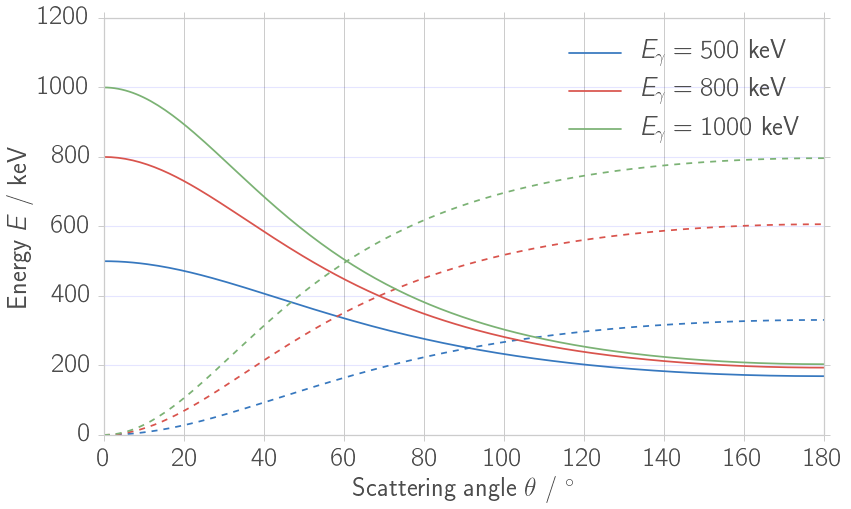

In [37]:
theta = np.linspace(0, 180, 200)
E_gammas = [500, 800, 1000] # keV

# Plotting
fig1, ax1 = plt.subplots(1, 1)
fixticks(ax1)
if not save_fig:
    fig1.suptitle("Distribution of energy of scattered photons and electrons")
for i, E_gamma in enumerate(E_gammas):
    ax1.plot(theta, E_photon(E_gamma, theta), '-', c=colors[i], 
             label='$E_\gamma = %i$ keV'%E_gamma)
    ax1.plot(theta, E_electron(E_gamma, theta), '--', c=colors[i])
ax1.set_xlabel("Scattering angle $\\theta$ / $^\circ$")
ax1.set_ylabel("Energy $E$ / keV")
ax1.set_xlim(0, 180)
ax1.set_ylim(0, 1200)
ax1.legend(loc=1,markerscale = 2)
ax1.grid(True)

ax1.yaxis.grid(True,'minor',linewidth=0.5,color = "blue", alpha = 0.1)
ax1.yaxis.grid(True,'major',linewidth=1.2, color = "blue", alpha = 0.1)
ax1.xaxis.grid(True)

if save_fig:
    file_name = "theory_conservation"
    fig1.savefig(fig_dir + file_name + ".pdf")
    fig1.savefig(fig_dir + file_name + ".png")
